In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import StringIO
from matplotlib import pyplot as plt
import datetime, time
import os
import json
import requests
# from bs4 import BeautifulSoup
from pprint import pprint
import pytrends as pt
from pytrends.request import TrendReq
# import pyjq
% matplotlib inline

In [3]:
def getJSON(url):
    start_time = time.time()
    header = {'x-requested-with': 'XMLHttpRequest'}
    mainPage = requests.get(url, headers = header)
    data = mainPage.json()
    print('Query finished in ' + str(time.time() - start_time))
    return data

In [5]:
#get CMC Symbol Info from API
try:
    data = getJSON("https://api.coinmarketcap.com/v1/ticker/")
except ValueError:
    print "CMC API Not Responding"

#write to dictionary
token_dict = {}

for x in range (0,50):
    token_dict[data[x]['symbol']] = data[x]['name']


print token_dict

Query finished in 0.151105880737
{u'NEO': u'NEO', u'BCN': u'Bytecoin', u'KMD': u'Komodo', u'BCH': u'Bitcoin Cash', u'GNT': u'Golem', u'STEEM': u'Steem', u'PAY': u'TenX', u'REP': u'Augur', u'XLM': u'Stellar Lumens', u'BAT': u'Basic Attention Token', u'BCC': u'BitConnect', u'EOS': u'EOS', u'ETC': u'Ethereum Classic', u'ETH': u'Ethereum', u'GNO': u'Gnosis', u'DGB': u'DigiByte', u'FCT': u'Factom', u'DGD': u'DigixDAO', u'QTUM': u'Qtum', u'STRAT': u'Stratis', u'LSK': u'Lisk', u'HSR': u'Hshare', u'PPT': u'Populous', u'DCR': u'Decred', u'GBYTE': u'Byteball', u'ICN': u'Iconomi', u'NXS': u'Nexus', u'ZEC': u'Zcash', u'DASH': u'Dash', u'MCAP': u'MCAP', u'MIOTA': u'IOTA', u'MTL': u'Metal', u'VERI': u'Veritaseum', u'USDT': u'Tether', u'XRP': u'Ripple', u'XMR': u'Monero', u'BTCD': u'BitcoinDark', u'LTC': u'Litecoin', u'OMG': u'OmiseGO', u'BTS': u'BitShares', u'XEM': u'NEM', u'DOGE': u'Dogecoin', u'PIVX': u'PIVX', u'SYS': u'Syscoin', u'MAID': u'MaidSafeCoin', u'ARDR': u'Ardor', u'BTC': u'Bitcoin', u'W

In [103]:
# data_repo = getJSON("https://api.github.com/users/ethereum/repos")
data_repo_2 = getJSON("https://api.github.com/users/ethereum/repos?sort=updated&direction=desc")

Query finished in 0.382964134216


In [36]:
repo_dict = {}
for x in range (0,30):
    repo_dict[data_repo[x]['name']] = data_repo[x]['full_name']

In [104]:
repo_dict_2 = {}
for x in range (0,30):
    repo_dict_2[data_repo_2[x]['name']] = data_repo_2[x]['full_name']

In [107]:
repo_dict

{u'EIPs': u'ethereum/EIPs',
 u'alethzero': u'ethereum/alethzero',
 u'bench': u'ethereum/bench',
 u'benchmarking': u'ethereum/benchmarking',
 u'blockies': u'ethereum/blockies',
 u'branding': u'ethereum/branding',
 u'browser-solidity': u'ethereum/browser-solidity',
 u'btcrelay': u'ethereum/btcrelay',
 u'casper': u'ethereum/casper',
 u'common': u'ethereum/common',
 u'cpp-dependencies': u'ethereum/cpp-dependencies',
 u'cpp-dependencies-win64': u'ethereum/cpp-dependencies-win64',
 u'cpp-ethash': u'ethereum/cpp-ethash',
 u'cpp-ethereum': u'ethereum/cpp-ethereum',
 u'cpp-ethereum-cmake': u'ethereum/cpp-ethereum-cmake',
 u'cryptopp': u'ethereum/cryptopp',
 u'dapp-bin': u'ethereum/dapp-bin',
 u'dapp-styles': u'ethereum/dapp-styles',
 u'devcommon': u'ethereum/devcommon',
 u'devp2p': u'ethereum/devp2p',
 u'diary': u'ethereum/diary',
 u'documentation': u'ethereum/documentation',
 u'economic-modeling': u'ethereum/economic-modeling',
 u'ecp': u'ethereum/ecp',
 u'emacs-solidity': u'ethereum/emacs-sol

In [66]:
data_aggregate = pd.DataFrame(columns=repo_dict.keys())

for repo in repo_dict.keys():
    try:
#     data_activity = getJSON("https://api.github.com/repos/ethereum/go-ethereum/stats/participation")['all']
        data_activity = getJSON("https://api.github.com/repos/"+repo_dict[repo]+"/stats/participation")['all']
        data_aggregate[repo] = data_activity
    except:
        pass

Query finished in 0.748620986938
Query finished in 0.2009370327
Query finished in 0.205806016922
Query finished in 0.19718003273
Query finished in 0.34043598175
Query finished in 0.209410190582
Query finished in 0.201059103012
Query finished in 0.20448589325
Query finished in 0.384979009628
Query finished in 0.206691980362
Query finished in 0.197906017303
Query finished in 0.198856830597
Query finished in 0.205863952637
Query finished in 0.335716962814
Query finished in 0.184262990952
Query finished in 0.192702054977
Query finished in 0.317847013474
Query finished in 0.193562030792
Query finished in 0.321593999863
Query finished in 0.199145078659
Query finished in 0.201925992966
Query finished in 0.196604967117
Query finished in 0.192946910858
Query finished in 0.195560932159
Query finished in 0.319674968719
Query finished in 0.190217971802
Query finished in 0.322877168655
Query finished in 0.337762117386
Query finished in 0.318160057068
Query finished in 0.208833217621


In [111]:
data_aggregate_2 = pd.DataFrame(columns=repo_dict_2.keys())
for repo in repo_dict_2.keys():
    try:
#     data_activity = getJSON("https://api.github.com/repos/ethereum/go-ethereum/stats/participation")['all']
        data_activity_2 = getJSON("https://api.github.com/repos/"+repo_dict_2[repo]+"/stats/participation")['all']
        data_aggregate_2[repo] = data_activity_2
    except:
        pass

Query finished in 0.229429960251
Query finished in 0.20750617981
Query finished in 0.200626134872
Query finished in 0.203160047531
Query finished in 0.326807022095
Query finished in 0.205183982849
Query finished in 0.220506906509
Query finished in 0.215399980545
Query finished in 0.199559926987
Query finished in 0.203361988068
Query finished in 0.205453157425
Query finished in 0.203399896622
Query finished in 0.327118873596
Query finished in 0.204365968704
Query finished in 0.203301906586
Query finished in 0.320847988129
Query finished in 0.323840856552
Query finished in 0.19766497612
Query finished in 0.195718050003
Query finished in 0.32424902916
Query finished in 0.192830085754
Query finished in 0.196010112762
Query finished in 0.195801973343
Query finished in 0.197048902512
Query finished in 0.19008898735
Query finished in 0.196529865265
Query finished in 0.191669940948
Query finished in 0.194936990738
Query finished in 0.1926009655
Query finished in 0.325446128845


In [112]:
data_aggregate_2.loc[51]

wiki                   0
serpent                0
btcrelay               0
rpc-tests              0
evmjit                 0
casper                 0
mist                   1
homestead-guide        0
ethereum-org           4
node-ethereum          0
cpp-ethereum          56
solc-js                0
research               1
solidity-examples      0
mix                    0
viper                NaN
go-ethereum          NaN
pm                   NaN
mining               NaN
yellowpaper          NaN
solidity             NaN
homebrew-ethereum    NaN
ethereumj            NaN
pyethapp             NaN
remix                NaN
alethzero            NaN
EIPs                 NaN
dapp-bin             NaN
pyethereum           NaN
web3.js              NaN
Name: 51, dtype: object

In [102]:
data_aggregate.sum().sort_values(ascending=False)

cpp-ethereum              1592
browser-solidity           984
ens                        278
casper                      50
ethash                       8
benchmarking                 0
blockies                     0
cpp-dependencies-win64       0
branding                     0
documentation                0
ethdev-site                  0
devcommon                    0
economic-modeling            0
btcrelay                     0
ethbot                       0
bench                        0
dapp-styles                  0
emacs-solidity               0
cpp-ethash                   0
diary                        0
ecp                          0
ens-registrar-dapp           0
cpp-dependencies             0
cryptopp                     0
EIPs                         0
devp2p                       0
common                       0
dapp-bin                     0
cpp-ethereum-cmake           0
alethzero                    0
dtype: int64

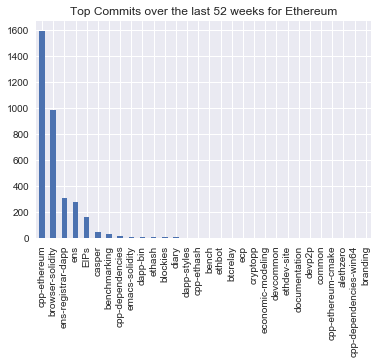

In [108]:
data_aggregate_2.sum().sort_values(ascending=False).plot(kind='bar', title='Top Commits over the last 52 weeks for Ethereum')

In [96]:
data_aggregate = data_aggregate.fillna(0)
data_aggregate.index = pd.date_range(end=datetime.date.today(),periods=52, freq='7D')

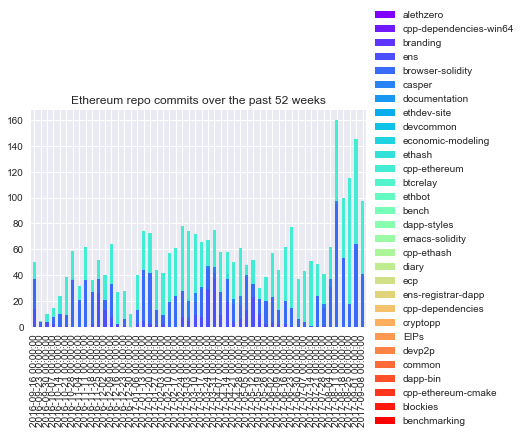

In [100]:
data_aggregate.plot(kind='bar',stacked=True, colormap='rainbow')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Ethereum repo commits over the past 52 weeks')

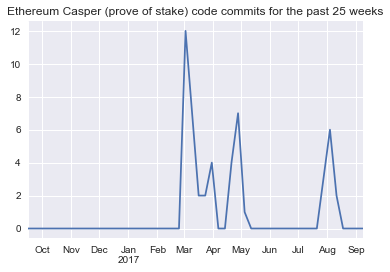

In [99]:
data_aggregate['casper'].plot(title='Ethereum Casper (prove of stake) code commits for the past 25 weeks')